# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our client who is a used car dealership is requesting us to find out what type of attributes or features have major impact of used car pricing, our analisys will allow the used car delaeship to prioritize the vehicules and fetaures that enable them to maximize their cars sales     

for this analisys we will foloww the CRIPT-DM model that requires understanding the data, preparing the data (cleaning and organizing), modeling the data, evaluating the data, and making observations to ensure our work is in line with the business  goals

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [163]:
#librraies that wew ill use Throughout the  process of completing the CRISP-DM framework
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.decomposition import PCA
from scipy.linalg import svd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [164]:
#Import data set 
cars = pd.read_csv('data/vehicles.csv')

In [165]:
#Summary of te dataset 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [166]:
#looking at the Dataset to get some insights about the columns and correposding values 
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [167]:
#Finding NaN Values 
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [168]:
#Data undertading continuation
print("Data Insights")
print()
print("Dataset has 18 columns with more than 42,000 entries and many NaN Values")
print()
print(u"\u2022 Dataset shows car prices from", cars['price'].min(), "to", cars['price'].max())
print(u"\u2022 Car oldest year:", int(cars['year'].min()))
print(u"\u2022 Car latest year:", int(cars['year'].max()))
print(u"\u2022 The car year",int(cars['year'].value_counts().index[0]),"has the most cars in invetory with",cars.year.value_counts().max(), "cars")
print(u"\u2022 Dataset shows", len(pd.unique(cars['manufacturer'])), "unique manufactures")
print(u"\u2022 Dataset shows",len(pd.unique(cars['condition'].dropna())),"type of conditions:", np.unique(cars['condition'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['cylinders'].dropna())),"type of cylinders:", np.unique(cars['cylinders'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['fuel'].dropna())),"type of fuel:", np.unique(cars['fuel'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['title_status'].dropna())),"type of title status:", np.unique(cars['title_status'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['transmission'].dropna())),"type of transmission:", np.unique(cars['transmission'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['drive'].dropna())),"type of drive:", np.unique(cars['drive'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['size'].dropna())),"type of size:", np.unique(cars['size'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows",len(pd.unique(cars['type'].dropna())),"type of type:", np.unique(cars['type'].dropna().values.tolist()) )
print(u"\u2022 Dataset shows that cars are source from ",len(pd.unique(cars['state'].dropna())),"states")
print(u"\u2022 California", cars['state'].value_counts().index[0], "has the most cars in inventory with", cars['state'].value_counts().max(), "cars") 
print(u"\u2022 North Dakota ", cars['state'].value_counts().index[-1], "has the fewest cars in inventory with", cars['state'].value_counts().min(), "cars")




Data Insights

Dataset has 18 columns with more than 42,000 entries and many NaN Values

• Dataset shows car prices from 0 to 3736928711
• Car oldest year: 1900
• Car latest year: 2022
• The car year 2017 has the most cars in invetory with 36420 cars
• Dataset shows 43 unique manufactures
• Dataset shows 6 type of conditions: ['excellent' 'fair' 'good' 'like new' 'new' 'salvage']
• Dataset shows 8 type of cylinders: ['10 cylinders' '12 cylinders' '3 cylinders' '4 cylinders' '5 cylinders'
 '6 cylinders' '8 cylinders' 'other']
• Dataset shows 5 type of fuel: ['diesel' 'electric' 'gas' 'hybrid' 'other']
• Dataset shows 6 type of title status: ['clean' 'lien' 'missing' 'parts only' 'rebuilt' 'salvage']
• Dataset shows 3 type of transmission: ['automatic' 'manual' 'other']
• Dataset shows 3 type of drive: ['4wd' 'fwd' 'rwd']
• Dataset shows 4 type of size: ['compact' 'full-size' 'mid-size' 'sub-compact']
• Dataset shows 13 type of type: ['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-v

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [169]:
#fisrt step is to clean data by removing Nan Values 
cars_clean_df = cars.dropna(subset=['region', 'manufacturer','price', 'year','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color'])

#ID and VIN appeared no to bring impact on pricing, we remove those parameters
cars_clean_df.drop(columns=['VIN', 'id'], inplace=True)

#Remove duplicates 
cars_clean_df.drop_duplicates(inplace=True)

#Reset index and drop index column
cars_clean_df = cars_clean_df.reset_index().drop(columns=['index'])

#With the year model we create another colum that calculates the age of the car using 2022 as the reference year 
cars_clean_df['age'] = 2022 - cars_clean_df.year.astype(int)

#remove Year column 
cars_clean_df = cars_clean_df.drop(columns=['year'])

#Remove all price values that are equal to cero 
cars_clean_df.drop(cars_clean_df.query("price== 0").index,inplace=True)



In [170]:
cars_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67495 entries, 0 to 70377
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        67495 non-null  object 
 1   price         67495 non-null  int64  
 2   manufacturer  67495 non-null  object 
 3   model         67495 non-null  object 
 4   condition     67495 non-null  object 
 5   cylinders     67495 non-null  object 
 6   fuel          67495 non-null  object 
 7   odometer      67495 non-null  float64
 8   title_status  67495 non-null  object 
 9   transmission  67495 non-null  object 
 10  drive         67495 non-null  object 
 11  size          67495 non-null  object 
 12  type          67495 non-null  object 
 13  paint_color   67495 non-null  object 
 14  state         67495 non-null  object 
 15  age           67495 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(13)
memory usage: 8.5+ MB


In [171]:
#as part of data preparation, non-numerical colums are trasformed to numerical values
encoders = []
def fun_encode(non_numerical_columns, dataframe_enc):
    for column in non_numerical_columns:
          en = LabelEncoder()
          encoders.append( en.fit(list(dataframe_enc[column].astype(str).values)))
          dataframe_enc[column] = en.transform(list(dataframe_enc[column].astype(str).values))
            


In [172]:
#Select none numerical columns
non_numerical_columns = cars_clean_df.select_dtypes(exclude=np.number).columns.to_list()
print(f'None numerical columns: {non_numerical_columns}\n\n')

#create a copy of dataframe
cars_clean_enc = cars_clean_df.copy()


#call label_encode function 
fun_encode(non_numerical_columns,cars_clean_enc)
cars_clean_enc.head()

None numerical columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']




,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
0,16,15000,13,3783,0,5,2,128000.0,0,0,2,1,10,0,1,9
1,16,19900,13,4134,2,6,0,88000.0,0,0,0,1,8,1,1,18
2,16,14000,16,6182,0,5,2,95000.0,0,0,1,1,5,9,1,10
3,16,22500,13,4266,2,6,0,144700.0,0,1,2,1,10,10,1,21
4,16,15000,10,2186,0,6,2,90000.0,4,0,2,2,9,5,1,5


In [173]:
cars_clean_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67495 entries, 0 to 70377
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        67495 non-null  int32  
 1   price         67495 non-null  int64  
 2   manufacturer  67495 non-null  int32  
 3   model         67495 non-null  int32  
 4   condition     67495 non-null  int32  
 5   cylinders     67495 non-null  int32  
 6   fuel          67495 non-null  int32  
 7   odometer      67495 non-null  float64
 8   title_status  67495 non-null  int32  
 9   transmission  67495 non-null  int32  
 10  drive         67495 non-null  int32  
 11  size          67495 non-null  int32  
 12  type          67495 non-null  int32  
 13  paint_color   67495 non-null  int32  
 14  state         67495 non-null  int32  
 15  age           67495 non-null  int32  
dtypes: float64(1), int32(14), int64(1)
memory usage: 5.1 MB


In [174]:
#one concern is the price outliers for example the most expensive car is $3,736,928,711 which doe sno make a lot of sense
#for a regular used card delaership unles they specialized in vintage cars which does not appear to be the case here so we remove
#cars above $1M
cars_clean_enc.drop(cars_clean_enc[cars_clean_enc['price'] > 1000000].index, inplace = True)

cars_clean_enc.sort_values(by=['price'], ascending=False).head(15)

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
33202,128,195000,36,8933,3,3,2,73000.0,1,1,0,1,9,5,22,5
16507,259,169999,11,708,0,6,2,13000.0,0,0,2,1,3,11,9,12
17919,323,165000,10,7882,4,6,2,12.0,0,0,2,1,3,7,9,4
54261,274,155000,26,1740,4,5,0,250.0,0,0,0,1,11,1,37,2
6303,257,150000,19,9111,0,5,2,64765.0,0,1,2,0,2,10,4,63
11830,80,150000,19,9116,0,5,2,64765.0,0,1,2,0,2,10,5,63
60899,18,150000,19,9116,0,5,2,64765.0,0,1,2,0,2,10,43,63
14146,79,150000,13,3456,2,3,2,182415.0,0,0,1,1,0,3,8,13
9568,0,150000,19,9112,0,5,2,64765.0,0,1,2,0,2,10,4,63
61511,72,144832,40,7097,2,4,2,144832.0,0,0,2,2,9,0,43,9


In [175]:
cars_clean_enc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67486 entries, 0 to 70377
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        67486 non-null  int32  
 1   price         67486 non-null  int64  
 2   manufacturer  67486 non-null  int32  
 3   model         67486 non-null  int32  
 4   condition     67486 non-null  int32  
 5   cylinders     67486 non-null  int32  
 6   fuel          67486 non-null  int32  
 7   odometer      67486 non-null  float64
 8   title_status  67486 non-null  int32  
 9   transmission  67486 non-null  int32  
 10  drive         67486 non-null  int32  
 11  size          67486 non-null  int32  
 12  type          67486 non-null  int32  
 13  paint_color   67486 non-null  int32  
 14  state         67486 non-null  int32  
 15  age           67486 non-null  int32  
dtypes: float64(1), int32(14), int64(1)
memory usage: 5.1 MB


In [176]:
#After preparing the data we create our firt plot 
#sns.pairplot(cars_clean_enc)

<Axes: xlabel='price', ylabel='Density'>

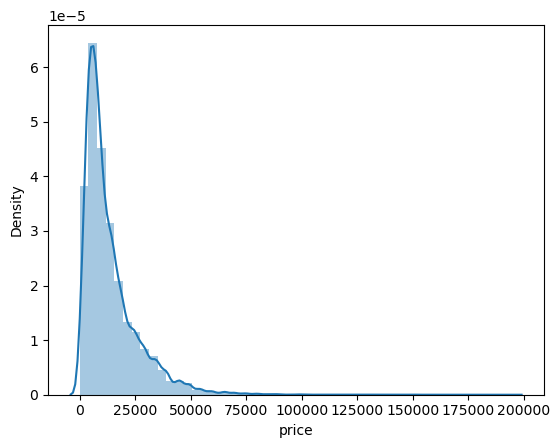

In [177]:
#lets have  alook at the price distribution  
sns.distplot((cars_clean_enc['price']))

Price has a normal distribution 

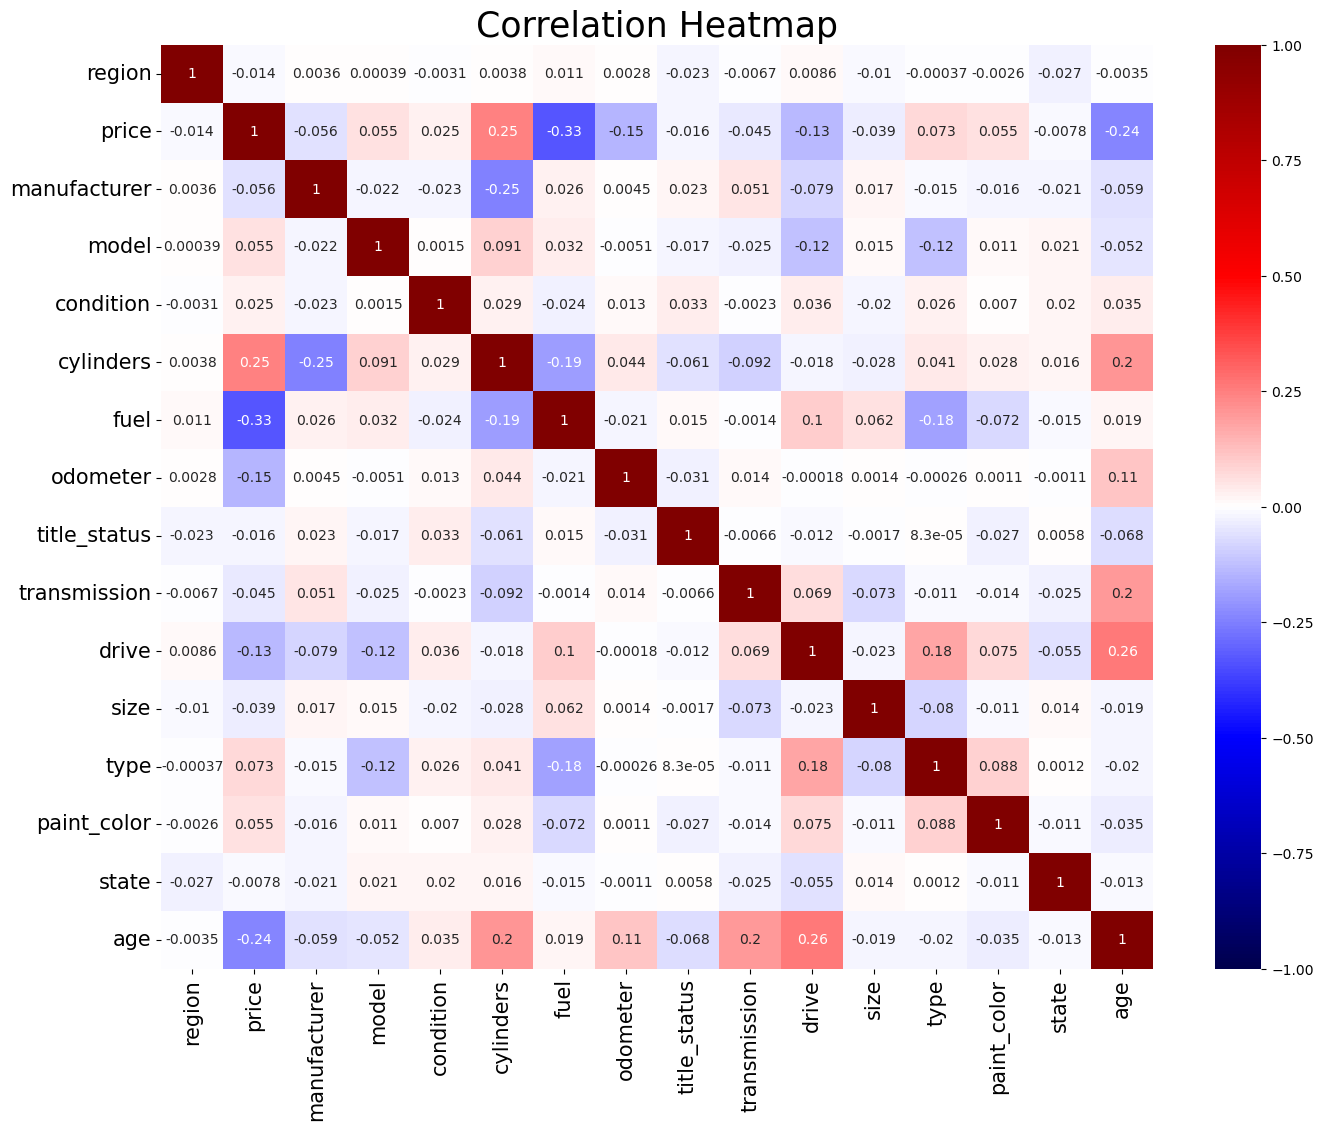

In [178]:
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Correlation Heatmap',fontsize = 25)
g = sns.heatmap(cars_clean_enc.corr(), vmin=-1, vmax=1, annot=True, cmap='seismic')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 15);

based on the heat map we appreciate that "Cylinders" has the most positive correlation with price and "Fuel", "Odometer", "Age" and drive have the most negative correlation, teh rest of the features have neligable correlation with price 

Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [179]:
#Features to play
#cols_to_drop = ['fuel','age']
#cars_clean_enc = cars_clean_enc.drop(columns=cols_to_drop).dropna()

In [180]:
#fisrt step is to separate datas et on training data and test data 
X = cars_clean_enc.drop(columns='price', axis=1)
y = cars_clean_enc['price']



scaler = StandardScaler()
X = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape, y_test.shape)
print(type(X_train), type(y_train))


(47240, 15) (20246,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [181]:
# Create an ensamble method to select best fit model
def reg_model_metrics(reg_models, X_train, X_test, y_train, y_test):
    """ Function takes in different dictionary of models and training and testing sets, 
    and ouputs the below metrics in a dataframe:
    1. R² or Coefficient of Determination.
    2. Adjusted R²
    3. Mean Squared Error(MSE)
    4. Root-Mean-Squared-Error(RMSE).
    5. Mean-Absolute-Error(MAE).
    6. Model training and test scores or accuracies
    7. Plots graph between actual vs predicted datasets
    """
    
    R2_result         = []
    MSE_result        = []
    RMSE_result       = []
    MAE_result        = []
    str_models        = []
    training_score    = []
    testing_score     = []
    
    for model_name, model in reg_models.items():
        
        # Get predicted values on x_test
        pred_model = model.fit(X_train,y_train)
        y_pred = pred_model.predict(X_test)
        str_models.append(str(model_name))
        
        #1 & 2 Coefficient of Determination (R²)
        r2 = r2_score(y_test,y_pred)
        R2_result.append(round(r2, 2))
       

        #3 & 4. MSE and RMSE
        mse = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=True)
        rmse = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
        MSE_result.append(np.log(round(mse, 2)))
        RMSE_result.append(np.log(round(rmse, 2)))

        #5. MAE
        mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
        MAE_result.append(np.log(round(mae, 2)))
    
        #6. Model training and test scores or accuracies
        train_score = round(pred_model.score(X_train, y_train)*100, 2)
        test_score = round(pred_model.score(X_test, y_test)*100, 2)
       
        training_score.append(train_score)
        testing_score.append(test_score)
        
      
        
        coeffs = pd.DataFrame(model.coef_, index=cars_clean_enc.drop(columns='price', axis=1).columns)
        coeffs.plot(kind='bar')
        plt.title(model_name)
        #plt.xlabel('X_train Values')
        #plt.xticks(size=15)



    return pd.DataFrame({'models':str_models, 'R2':R2_result,'MSE':MSE_result,
                         'RMSE':RMSE_result,'MAE': MAE_result,
                         'Training_Score':training_score,
                         'Test_Score':testing_score
                        }) 


,models,R2,MSE,RMSE,MAE,Training_Score,Test_Score
0,Linear Regression,0.25,18.591896,9.295948,8.913700,24.15,24.6
1,Ridge,0.25,18.591896,9.295948,8.913702,24.15,24.6
2,Lasso,0.25,18.591902,9.295951,8.913729,24.15,24.6


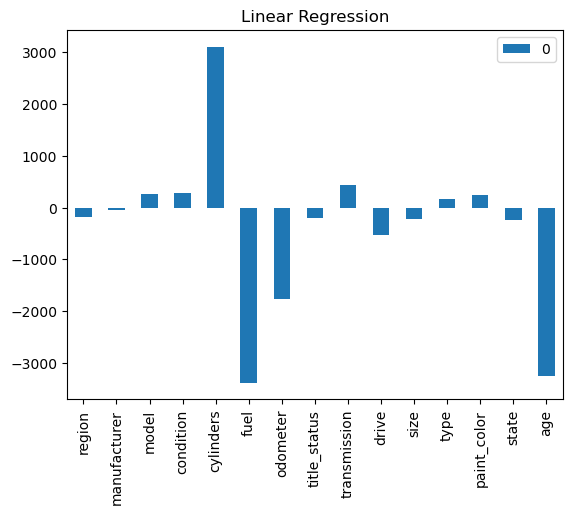

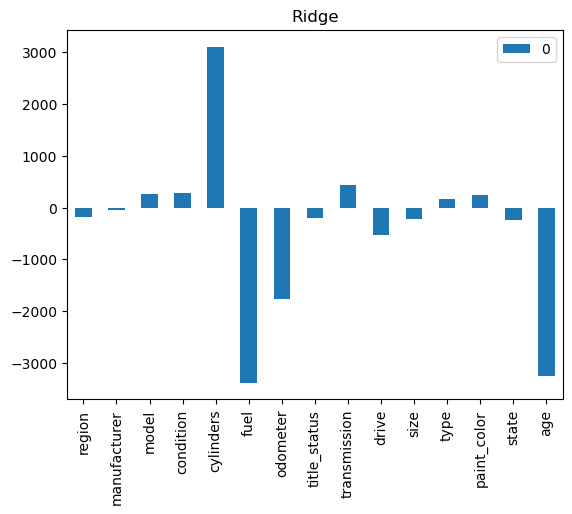

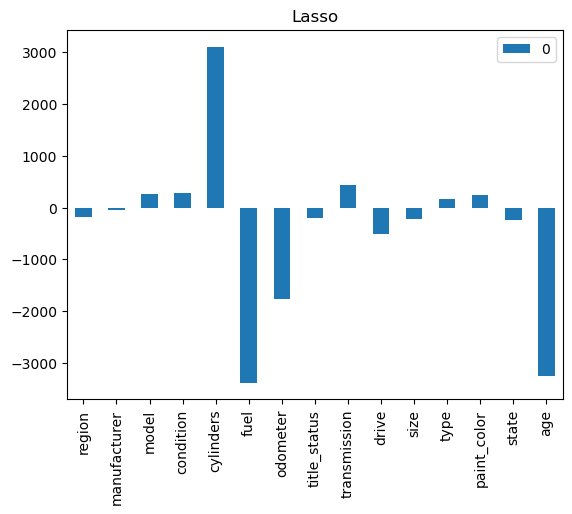

In [182]:
regression_models={'Linear Regression':LinearRegression(), 
                   'Ridge' : Ridge(),
                   'Lasso' : Lasso()
                  }

reg_model_metrics(regression_models,X_train, X_test, y_train, y_test)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

for this analisys the 3 models: Linear regresion, Ridge and Lasso show similar performance results, Lasso model shows very marginal lower MSE and very marginal bigger RMSE, during data preparation the removal of price outliers contributed to these models to perform very similar   

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client. You should organize your work as a basic report that details your primary findings. Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Practical application assignment customer report

This report provides recommendations to our customer on what features are more important to consider in maximizing used car sales. for this analysis, we used a dataset from Kaggle that contained information on more than 400K used cars and used machine learning techniques we provide the below recommendations: Analysis shows that the features that are more relevant to used car prices are:

Number of cylinders: The price of the vehicle is higher when the number of cylinders is higher, and this feature is the one with a major impact on the price of the car.
Transmission: our analysis shows that this feature has the second-largest impact on the price of the car.
Model, condition, and paint color also show a positive impact on the price of the car.
In contrast, our analysis shows the following features have a negative impact on the price of the car

Fuel: this feature has the most negative impact on the price of the car
Age: this feature is the second largest feature with a negative impact on the car price
Odometer: the feature also has a significant negative impact on the price of the car
This analysis was conducted using the CRISP-DM Framework and we applied 3 regression models: linear regression, Ridge, and Lasso regression. Our models showed similar performance as shown below.

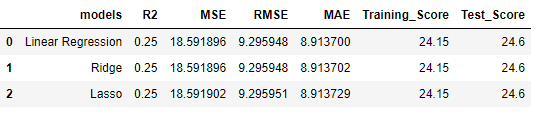

Linear regression and Ridge models show almost identical performance and Lasso regression shows slightly worse MSE, RMSE, and MAE. Although any of those models can be used to predict car prices. We recommend using liner regression that shows the best metrics